In [1]:
import csv
import pandas as pd
import pingouin as pg

In [2]:
with open('Data/data_1.csv') as data_f:
    df = pd.read_csv(data_f)
   

In [3]:
df_n = df[df['conspiracy_pred']==True].groupby(['strategy', 'user', 'vids_watched']).size().reset_index(name = 'n_consp')

df_n

,strategy,user,vids_watched,n_consp
0,strategy 1,scriptiebot1@gmail.com,1,1
1,strategy 1,scriptiebot1@gmail.com,2,2
2,strategy 1,scriptiebot1@gmail.com,3,3
3,strategy 1,scriptiebot1@gmail.com,4,2
4,strategy 1,scriptiebot1@gmail.com,5,2
...,...,...,...,...
268,strategy 4,scriptiebot20a@gmail.com,10,9
269,strategy 4,scriptiebot20a@gmail.com,11,10
270,strategy 4,scriptiebot20a@gmail.com,13,14
271,strategy 4,scriptiebot20a@gmail.com,14,13


In [4]:
aov = pg.mixed_anova(effsize = 'n2', dv = 'n_consp', between = 'strategy', within = 'vids_watched', subject = 'user', data = df_n)
pg.print_table(aov)



ANOVA SUMMARY

Source             SS    DF1    DF2       MS       F    p-unc     n2      eps
------------  -------  -----  -----  -------  ------  -------  -----  -------
strategy      988.960      3      6  329.653  10.536    0.008  0.366  nan
vids_watched  697.893     14     84   49.850  10.505    0.000  0.259    0.211
Interaction   425.507     42     84   10.131   2.135    0.002  0.158  nan



In [35]:
posthocs = pg.pairwise_ttests(dv='n_consp', between='strategy', within='vids_watched', subject='user', 
                              data = df_n, nan_policy = 'pairwise',
                              interaction = True, return_desc = True,
                              effsize = 'hedges')


posthocs[posthocs["Contrast"]=='vids_watched * strategy'][posthocs['A']=='strategy 1']

/tmp/ipykernel_8772/3036123102.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  posthocs[posthocs["Contrast"]=='vids_watched * strategy'][posthocs['A']=='strategy 1']


,Contrast,vids_watched,A,B,mean(A),std(A),mean(B),std(B),Paired,Parametric,T,dof,alternative,p-unc,BF10,hedges
111,vids_watched * strategy,1,strategy 1,strategy 2,1.250000,0.500000,2.60,0.547723,False,True,-3.857143,6.814570,two-sided,0.006565,7.14,-2.273594
112,vids_watched * strategy,1,strategy 1,strategy 3,1.250000,0.500000,1.60,0.894427,False,True,-0.741999,6.427644,two-sided,0.484311,0.6,-0.414158
113,vids_watched * strategy,1,strategy 1,strategy 4,1.250000,0.500000,3.60,2.302173,False,True,-2.218067,4.464908,two-sided,0.083777,1.661,-1.179634
117,vids_watched * strategy,2,strategy 1,strategy 2,1.750000,0.957427,2.20,1.303840,False,True,-0.596476,6.980825,two-sided,0.569687,0.567,-0.342458
118,vids_watched * strategy,2,strategy 1,strategy 3,1.750000,0.957427,2.50,1.732051,False,True,-0.757937,6.000000,two-sided,0.477192,0.619,-0.466037
119,vids_watched * strategy,2,strategy 1,strategy 4,1.750000,0.957427,3.40,2.701851,False,True,-1.269544,5.183964,two-sided,0.258255,0.8,-0.686507
123,vids_watched * strategy,3,strategy 1,strategy 2,3.333333,2.516611,3.60,0.894427,False,True,-0.176950,2.308017,two-sided,0.873885,0.537,-0.142595
124,vids_watched * strategy,3,strategy 1,strategy 3,3.333333,2.516611,5.00,2.549510,False,True,-0.902404,4.389340,two-sided,0.413620,0.669,-0.570898
125,vids_watched * strategy,3,strategy 1,strategy 4,3.333333,2.516611,4.40,1.816590,False,True,-0.640769,3.285446,two-sided,0.563588,0.599,-0.446721
129,vids_watched * strategy,4,strategy 1,strategy 2,2.500000,0.707107,2.60,1.673320,False,True,-0.111111,4.656494,two-sided,0.916157,0.571,-0.055050


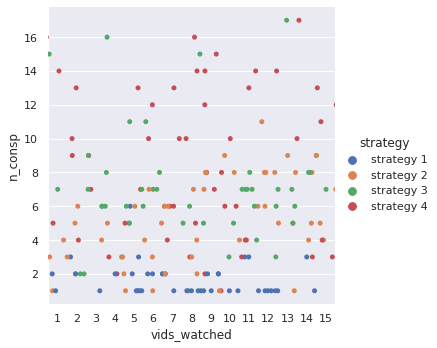

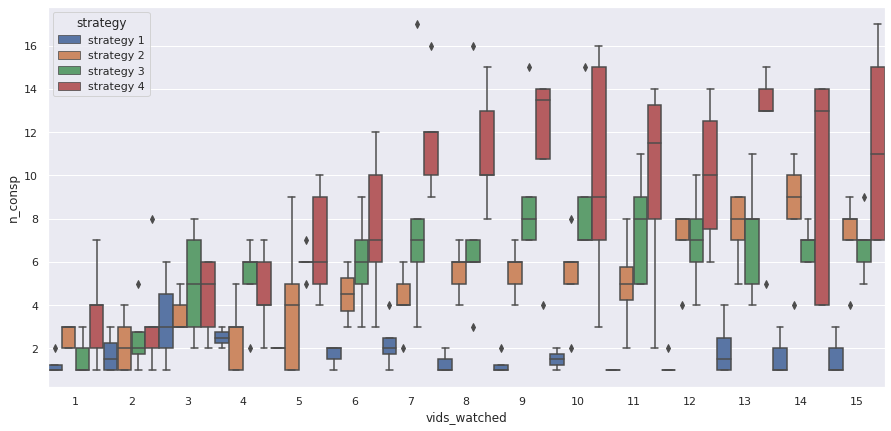

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns


sns.set(rc={'figure.figsize':(15,7)})

ax = sns.catplot(x='vids_watched', y='n_consp', hue='strategy', data=df_n, jitter = 10)

plt.show()

ax = sns.boxplot(x='vids_watched', y='n_consp', hue='strategy', data=df_n, width = 1)

plt.show()

In [7]:
power_between = pg.power_ttest(d=-3.175, n=5, alpha = 0.05)
power_within = pg.power_ttest(d=-0.607, n=20, alpha = 0.05)
power_interaction = pg.power_ttest(d=-1.641, n=5, alpha = 0.05)

print(power_between)
print(power_within)
print(power_interaction)

0.9917431221745951
0.4645892669367423
0.6245858117762852


In [8]:
power_between = pg.power_anova(eta=0.366, k = 4, n=5, alpha=0.05)
power_within = pg.power_anova(eta=0.259, k=15,  n=5, alpha=0.05)

print(power_between)
print(power_within)

0.7133242513907824
0.8788424349546916


In [9]:
df_n_by_strat = df_n.groupby(['strategy'])['n_consp'].mean().reset_index(name='n_consp')
df_n_by_strat

,strategy,n_consp
0,strategy 1,1.709091
1,strategy 2,5.013889
2,strategy 3,6.432432
3,strategy 4,8.430556


In [10]:
prob = df_n.apply(lambda row: row.n_consp/20, axis =1)
df_prob = df_n.assign(prob_consp = prob)

df_prob

,strategy,user,vids_watched,n_consp,prob_consp
0,strategy 1,scriptiebot1@gmail.com,1,1,0.05
1,strategy 1,scriptiebot1@gmail.com,2,2,0.10
2,strategy 1,scriptiebot1@gmail.com,3,3,0.15
3,strategy 1,scriptiebot1@gmail.com,4,2,0.10
4,strategy 1,scriptiebot1@gmail.com,5,2,0.10
...,...,...,...,...,...
268,strategy 4,scriptiebot20a@gmail.com,10,9,0.45
269,strategy 4,scriptiebot20a@gmail.com,11,10,0.50
270,strategy 4,scriptiebot20a@gmail.com,13,14,0.70
271,strategy 4,scriptiebot20a@gmail.com,14,13,0.65


In [11]:


df_prob_by_strat = df_prob.groupby(['strategy'])['prob_consp'].mean().reset_index(name='prob_consp')
df_prob_by_strat

,strategy,prob_consp
0,strategy 1,0.085455
1,strategy 2,0.250694
2,strategy 3,0.321622
3,strategy 4,0.421528


In [12]:
df_prob_control = df_prob_by_strat[df_prob_by_strat['strategy'] == 'strategy 1'].mean()
df_prob_treatment = df_prob_by_strat[df_prob_by_strat['strategy'] != 'strategy 1'].groupby('strategy').mean().reset_index()


df_odds_by_strat = pd.DataFrame(data={'strategy':['strat 2','strat 3','strat 4'],
                                   'odds_tot':[(df_prob_treatment['prob_consp'][df_prob_treatment['strategy']=='strategy 2']/df_prob_control[0])[0],
                                               (df_prob_treatment['prob_consp'][df_prob_treatment['strategy']=='strategy 3']/df_prob_control[0])[1],
                                               (df_prob_treatment['prob_consp'][df_prob_treatment['strategy']=='strategy 4']/df_prob_control[0])[2]]})


df_odds_by_strat

/tmp/ipykernel_8772/142387702.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_prob_control = df_prob_by_strat[df_prob_by_strat['strategy'] == 'strategy 1'].mean()


,strategy,odds_tot
0,strat 2,2.933658
1,strat 3,3.763657
2,strat 4,4.932772


In [18]:
df_prob_by_step = df_prob.groupby(['vids_watched','strategy']).mean().reset_index()

df_prob_by_step



,vids_watched,strategy,n_consp,prob_consp
0,1,strategy 1,1.250000,0.062500
1,1,strategy 2,2.600000,0.130000
2,1,strategy 3,1.600000,0.080000
3,1,strategy 4,3.600000,0.180000
4,2,strategy 1,1.750000,0.087500
5,2,strategy 2,2.200000,0.110000
6,2,strategy 3,2.500000,0.125000
7,2,strategy 4,3.400000,0.170000
8,3,strategy 1,3.333333,0.166667
9,3,strategy 2,3.600000,0.180000


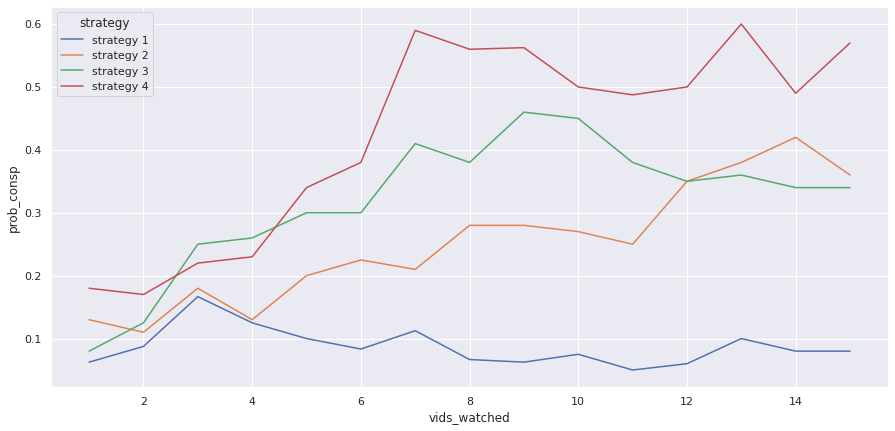

In [21]:
ax = sns.lineplot(x='vids_watched', y='prob_consp', hue='strategy',  data = df_prob_by_step)
plt.show()


In [14]:
odds_strat2 = (df_prob_by_step[df_prob_by_step['strategy'] == 'strategy 2'].set_index('vids_watched')['prob_consp']/df_prob_by_step[df_prob_by_step['strategy'] == 'strategy 1'].set_index('vids_watched')['prob_consp']).to_frame().rename(columns={'prob_consp':'odds_strat2'})
odds_strat3 = (df_prob_by_step[df_prob_by_step['strategy'] == 'strategy 3'].set_index('vids_watched')['prob_consp']/df_prob_by_step[df_prob_by_step['strategy'] == 'strategy 1'].set_index('vids_watched')['prob_consp']).to_frame().rename(columns={'prob_consp':'odds_strat3'})
odds_strat4 = (df_prob_by_step[df_prob_by_step['strategy'] == 'strategy 4'].set_index('vids_watched')['prob_consp']/df_prob_by_step[df_prob_by_step['strategy'] == 'strategy 1'].set_index('vids_watched')['prob_consp']).to_frame().rename(columns={'prob_consp':'odds_strat4'})

odds_by_strat = pd.concat([odds_strat2, odds_strat3, odds_strat4], axis=1)
odds_by_strat.loc['avg'] = odds_by_strat.mean()

odds_by_strat

,odds_strat2,odds_strat3,odds_strat4
vids_watched,,,
1,2.080000,1.280000,2.880000
2,1.257143,1.428571,1.942857
3,1.080000,1.500000,1.320000
4,1.040000,2.080000,1.840000
5,2.000000,3.000000,3.400000
6,2.700000,3.600000,4.560000
7,1.866667,3.644444,5.244444
8,4.200000,5.700000,8.400000
9,4.480000,7.360000,9.000000


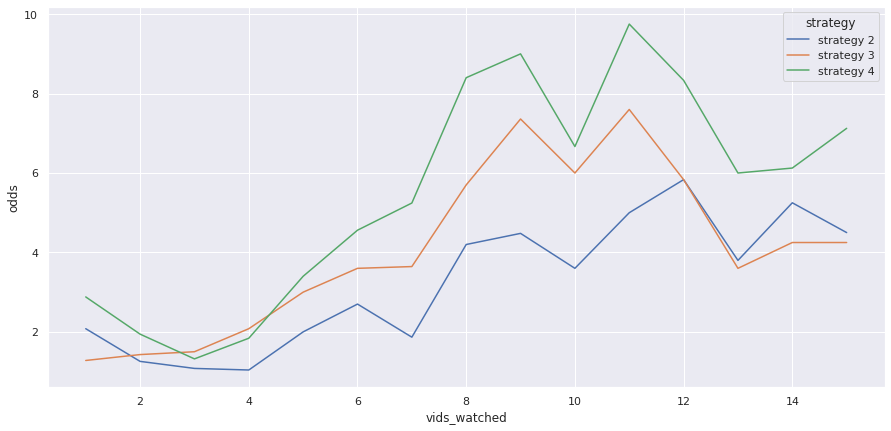

In [15]:
odds_strat2 = (df_prob_by_step[df_prob_by_step['strategy'] == 'strategy 2'].set_index('vids_watched')['prob_consp']/df_prob_by_step[df_prob_by_step['strategy'] == 'strategy 1'].set_index('vids_watched')['prob_consp']).to_frame().rename(columns={'prob_consp':'odds'})
odds_strat3 = (df_prob_by_step[df_prob_by_step['strategy'] == 'strategy 3'].set_index('vids_watched')['prob_consp']/df_prob_by_step[df_prob_by_step['strategy'] == 'strategy 1'].set_index('vids_watched')['prob_consp']).to_frame().rename(columns={'prob_consp':'odds'})
odds_strat4 = (df_prob_by_step[df_prob_by_step['strategy'] == 'strategy 4'].set_index('vids_watched')['prob_consp']/df_prob_by_step[df_prob_by_step['strategy'] == 'strategy 1'].set_index('vids_watched')['prob_consp']).to_frame().rename(columns={'prob_consp':'odds'})

odds_strat2['strategy'] = 'strategy 2'
odds_strat3['strategy']='strategy 3'
odds_strat4['strategy']='strategy 4'

odds_by_strat_long = pd.concat([odds_strat2, odds_strat3, odds_strat4], axis=0).reset_index()



ax = sns.lineplot(x='vids_watched', y='odds', hue='strategy',  data = odds_by_strat_long)
plt.show()